In [52]:
import scipy.io
import utils
import torch
import numpy as np
import TWIST
import visualize as vis

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Load data

In [96]:
data_path = '../data/NC_m16_np1_df0.25_32x32x1.mat'

m = 16 # no of patterns
nump = 1 # no of detected planes
df = 0.25 # downsampling factor
nx = 32 # width of a plane (dy = 1/3 um)
ny = 32 # height of a plane (dx = 1/3 um)
nz = 1 # number of planes (dz = 1 um)

data = scipy.io.loadmat(data_path)

FM = data['A']
X = data['X_original'].T
y_clean = data['Y'].T
y_noisy = data['Yn'].T

Visualize measurement matrix A

In [97]:
# vis.visualize_A(FM, nx, ny, nz, nump, m, df, figsize=(6, 6))

In [98]:
# vis.visualize_A(np.log(FM), nx, ny, nz, nump, m, df, figsize=(6, 6))

Visualize object X

In [99]:
# vis.visualize_X(X, nx, ny, nz, figsize=(15, 15), planes_to_plot=range(nz))

Visualize measurement y

In [100]:
# clean measurements
# vis.visualize_y(y_clean, nx, ny, df, m, nump, figsize=(15, 15))

In [101]:
# noisy measurements
# vis.visualize_y(y_noisy, nx, ny, df, m, nump, figsize=(15, 8))

Run twist

In [155]:
y = y_clean # observed data

# absAty = np.abs(utils.AT(y, FM, nx, ny, nz))
# tau = 1e-7*np.max(absAty) # Regularization parameter
tau = 0 # Regularization parameter
Psi = 'TV' # denoising function ('TV', 'SOFT', 'SOFT_FD')
Phi = 'TV' # regularization function ('TV', 'L1', 'L1_FD')
lam1 = 1e-4 # twist parameter
stop_criterion = 1 # 0:non-zero components, 1:change in obj func, 2:estimate, 3:value of obj func 
tolA = 1e-3 # Stopping threshold
init = 0 # 0:zero, 1:random, 2:Aty, 3:init_x given by user
init_x = None # initial estimate

x_twist, dummy, obj_twist, times_twist, dummy, mse_twist, dummy = TWIST.TwIST(y, FM, tau, nx, ny, nz,
                                                                                Psi = Psi,
                                                                                Phi = Phi,
                                                                                lam1 = 1e-4, 
                                                                                alpha = 0,
                                                                                beta = 0,
                                                                                stop_criterion = stop_criterion,
                                                                                tolA = tolA,
                                                                                init = init,
                                                                                init_x = init_x,
                                                                                sparse = 0,
                                                                                enforceMonotone = 1,
                                                                                true_x = X,
                                                                                compute_mse = 1,
                                                                                verbose = 1)


Initial objective = 1705037.0, nonzeros = 0
Incrementing S = 2
Incrementing S = 4
Incrementing S = 8
Incrementing S = 16
Incrementing S = 32
Incrementing S = 64
Incrementing S = 128
Incrementing S = 256
Incrementing S = 512
Incrementing S = 1024
Incrementing S = 2048
Incrementing S = 4096
Incrementing S = 8192
Incrementing S = 16384
Incrementing S = 32768
Incrementing S = 65536
Iteration = 2, objective = 1050906.8609677288, nz = 1024, criterion = 0.0
Incrementing S = 131072
Iteration = 3, objective = 53481.73353265478, nz = 1024, criterion = 0.0
Iteration = 4, objective = 17868.44785630945, nz = 1024, criterion = 0.0
Iteration = 5, objective = 11624.904407692702, nz = 1024, criterion = 0.0
Iteration = 6, objective = 3469.591629320854, nz = 1024, criterion = 0.0
Iteration = 7, objective = 2183.618316940791, nz = 1024, criterion = 0.0

Finished the main algorithm!
Results:
||A x - y ||_2 = 4367.236633881582
||x||_1 = 109.10488596687074
Objective function = 2183.618316940791
Number of no

In [156]:
# vis.obj_mse_twist(obj_twist, times_twist, mse_twist, figsize=(12, 5))

lstsq reconstruction

In [157]:
y_torch = torch.from_numpy(y) 
FM_torch = torch.from_numpy(FM) 
x_lstsq = torch.linalg.lstsq(FM_torch, y_torch).solution  

lstq results

In [158]:
# vis.comparison2(X, x_lstsq, nx, ny, nz, figsize=(15, 6), planes_to_plot=range(0,nz,1))

twist results

In [159]:
# vis.comparison2(X, x_twist, nx, ny, nz, figsize=(15, 8), planes_to_plot=range(1,nz,2))

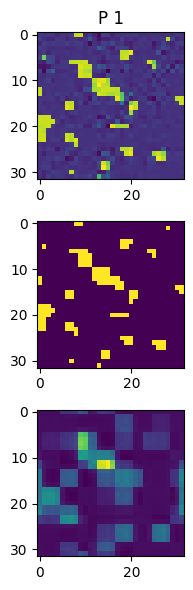

In [160]:
vis.comparison3(x_lstsq, X, x_twist, nx, ny, nz, figsize=(15, 6), planes_to_plot=range(0,nz,1))